In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.0.0


In [1]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [2]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp

import pathlib
import shutil
import tempfile

In [5]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequence(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results


In [6]:
train_data = multi_hot_sequence(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequence(test_data, dimension=NUM_WORDS)

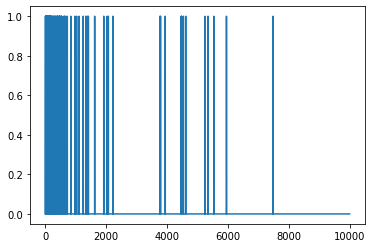

In [7]:
plt.plot(train_data[0])

In [19]:
def train_basemodel():
    baseline_model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    baseline_model.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy', 'binary_crossentropy'])
    baseline_model.summary()

    baseline_history = baseline_model.fit(train_data,
                                          train_labels,
                                          epochs=20,
                                          batch_size=512,
                                          validation_data=(test_data, test_labels),
                                          verbose=2)
    return baseline_history

In [11]:
with mp.Pool() as pool:
    baseline_history = pool.apply_async(train_basemodel)
    pool.close()
    pool.join()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.3620 - accuracy: 0.8525 - binary_crossentropy: 0.3620 - val_loss: 0.2928 - val_accuracy: 0.8828 - val_binary_crossentropy: 0.2928
Epoch 2/20
25000/25000 - 2s - loss: 0.1913 - accuracy: 0.9285 - binary_crossentropy: 0.1913 - val_loss: 0.3167 - val_accuracy: 0.8771 - val_binary_crossentropy: 0

In [20]:
baseline_history = train_basemodel()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5886 - accuracy: 0.6344 - binary_crossentropy: 0.5886 - val_loss: 0.5068 - val_accuracy: 0.8197 - val_binary_crossentropy: 0.5068
Epoch 2/20
25000/25000 - 2s - loss: 0.3993 - accuracy: 0.8882 - binary_crossentropy: 0.3993 - val_loss: 0.3434 - val_accuracy: 0.8844 - val_binary_crossentropy:

In [21]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [22]:
smalle_history = smaller_model.fit(train_data, train_labels,
                                   epochs=20, batch_size=512, validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6307 - accuracy: 0.7364 - binary_crossentropy: 0.6307 - val_loss: 0.5433 - val_accuracy: 0.8370 - val_binary_crossentropy: 0.5433
Epoch 2/20
25000/25000 - 2s - loss: 0.4457 - accuracy: 0.8690 - binary_crossentropy: 0.4457 - val_loss: 0.4008 - val_accuracy: 0.8675 - val_binary_crossentropy: 0.4008
Epoch 3/20
25000/25000 - 2s - loss: 0.3268 - accuracy: 0.8969 - binary_crossentropy: 0.3268 - val_loss: 0.3342 - val_accuracy: 0.8804 - val_binary_crossentropy: 0.3342
Epoch 4/20
25000/25000 - 2s - loss: 0.2631 - accuracy: 0.9146 - binary_crossentropy: 0.2631 - val_loss: 0.3022 - val_accuracy: 0.8871 - val_binary_crossentropy: 0.3022
Epoch 5/20
25000/25000 - 2s - loss: 0.2240 - accuracy: 0.9263 - binary_crossentropy: 0.2240 - val_loss: 0.2882 - val_accuracy: 0.8878 - val_binary_crossentropy: 0.2882
Epoch 6/20
25000/25000 - 2s - loss: 0.1971 - accuracy: 0.9355 - binary_crossentropy: 0.1971 - val_loss: 0.2825

In [26]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimzier='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])
bigger_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [28]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20, batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.4498 - accuracy: 0.7974 - binary_crossentropy: 0.4498 - val_loss: 0.2826 - val_accuracy: 0.8866 - val_binary_crossentropy: 0.2826
Epoch 2/20
25000/25000 - 2s - loss: 0.2135 - accuracy: 0.9156 - binary_crossentropy: 0.2135 - val_loss: 0.2771 - val_accuracy: 0.8869 - val_binary_crossentropy: 0.2771
Epoch 3/20
25000/25000 - 2s - loss: 0.1202 - accuracy: 0.9572 - binary_crossentropy: 0.1202 - val_loss: 0.6031 - val_accuracy: 0.8170 - val_binary_crossentropy: 0.6031
Epoch 4/20
25000/25000 - 2s - loss: 0.0643 - accuracy: 0.9810 - binary_crossentropy: 0.0643 - val_loss: 0.4372 - val_accuracy: 0.8821 - val_binary_crossentropy: 0.4372
Epoch 5/20
25000/25000 - 2s - loss: 0.0633 - accuracy: 0.9873 - binary_crossentropy: 0.0633 - val_loss: 0.4805 - val_accuracy: 0.8817 - val_binary_crossentropy: 0.4805
Epoch 6/20
25000/25000 - 2s - loss: 0.0439 - accuracy: 0.9942 - binary_crossentropy: 0.0439 - val_loss: 2.6216

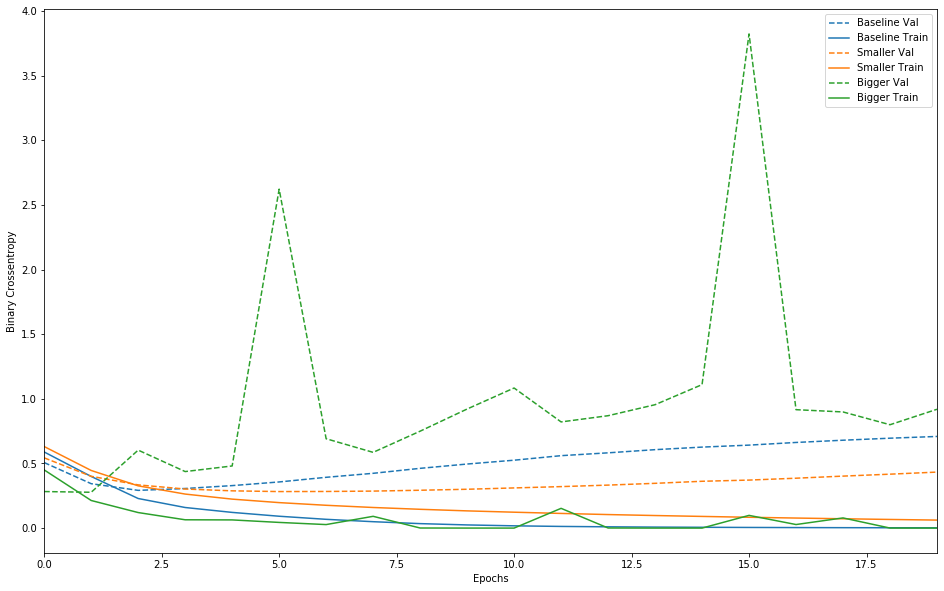

In [30]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key],
                      '--', label=name.title() + " Val")
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title() + " Train")
        
        plt.xlabel("Epochs")
        plt.ylabel(key.replace('_', ' ').title())
        plt.legend()
        
        plt.xlim([0, max(history.epoch)])
        
plot_history([('baseline', baseline_history),
              ('smaller', smalle_history),
              ('bigger', bigger_history)])

In [31]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20, batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.5073 - accuracy: 0.8171 - binary_crossentropy: 0.4661 - val_loss: 0.3724 - val_accuracy: 0.8782 - val_binary_crossentropy: 0.3288
Epoch 2/20
25000/25000 - 2s - loss: 0.2986 - accuracy: 0.9120 - binary_crossentropy: 0.2512 - val_loss: 0.3370 - val_accuracy: 0.8857 - val_binary_crossentropy: 0.2870
Epoch 3/20
25000/25000 - 2s - loss: 0.2534 - accuracy: 0.9281 - binary_crossentropy: 0.2014 - val_loss: 0.3376 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2839
Epoch 4/20
25000/25000 - 2s - loss: 0.2284 - accuracy: 0.9413 - binary_crossentropy: 0.1731 - val_loss: 0.3497 - val_accuracy: 0.8822 - val_binary_crossentropy: 0.2936
Epoch 5/20
25000/25000 - 2s - loss: 0.2158 - accuracy: 0.9460 - binary_crossentropy: 0.1585 - val_loss: 0.3601 - val_accuracy: 0.8794 - val_binary_crossentropy: 0.3023
Epoch 6/20
25000/25000 - 2s - loss: 0.2053 - accuracy: 0.9510 - binary_crossentropy: 0.1467 - val_loss: 0.3740

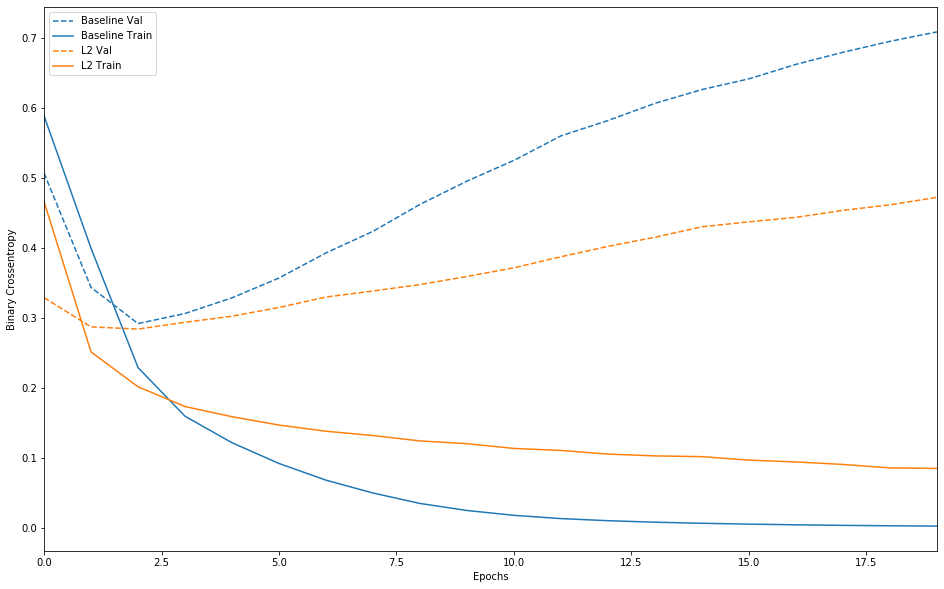

In [32]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [34]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6070 - accuracy: 0.6532 - binary_crossentropy: 0.6070 - val_loss: 0.4630 - val_accuracy: 0.8555 - val_binary_crossentropy: 0.4630
Epoch 2/20
25000/25000 - 2s - loss: 0.4316 - accuracy: 0.8249 - binary_crossentropy: 0.4316 - val_loss: 0.3317 - val_accuracy: 0.8786 - val_binary_crossentropy: 0.3317
Epoch 3/20
25000/25000 - 2s - loss: 0.3311 - accuracy: 0.8794 - binary_crossentropy: 0.3311 - val_loss: 0.2881 - val_accuracy: 0.8862 - val_binary_crossentropy: 0.2881
Epoch 4/20
25000/25000 - 2s - loss: 0.2769 - accuracy: 0.9041 - binary_crossentropy: 0.2769 - val_loss: 0.2762 - val_accuracy: 0.8877 - val_binary_crossentropy: 0.2762
Epoch 5/20
25000/25000 - 2s - loss: 0.2389 - accuracy: 0.9205 - binary_crossentropy: 0.2389 - val_loss: 0.2863 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2863
Epoch 6/20
25000/25000 - 2s - loss: 0.2072 - accuracy: 0.9319 - binary_crossentropy: 0.2072 - val_loss: 0.2911

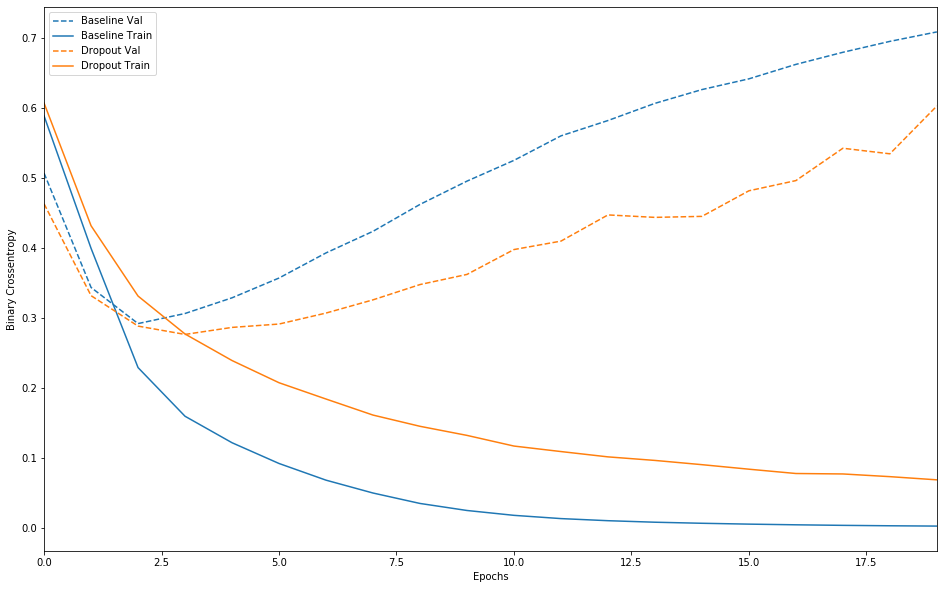

In [35]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])